# MMIOレイテンシの測定
コード：
```
  for (int i = 0; i < 200000; i++) {
    usleep(1);
    uint64_t t3, t5;
    uint32_t a1, a2, c1, c2, d1, d2;
    rdtsc_raw(a1, c1, d1);
    asm volatile(""::"r"(base32[0x08C0C / sizeof(uint32_t)]));
    asm volatile(""::"r"(base32[0x08C10 / sizeof(uint32_t)]));
    rdtsc_raw(a2, c2, d2);
    t3 = conv_to_nanosec(((uint64_t)a1) | (((uint64_t)d1) << 32));
    t5 = conv_to_nanosec(((uint64_t)a2) | (((uint64_t)d2) << 32));
    printf("%lu\n", t5 - t3);
  }
```

裏でiperfを走らせている場合と、何も通信をしていない場合で比較。

iper出力は以下の通り（jk1 → jk2）
```
awamoto@jk1:~/uio$ iperf -c 192.168.1.11 -l 5.5G
------------------------------------------------------------
Client connecting to 192.168.1.11, TCP port 5001
TCP window size: 85.0 KByte (default)
------------------------------------------------------------
[  3] local 192.168.1.10 port 44174 connected with 192.168.1.11 port 5001
[ ID] Interval       Transfer     Bandwidth
[  3]  0.0-12.5 sec  13.5 GBytes  9.25 Gbits/sec
```

MMIOの計測はjk1上で実行

## linear scale

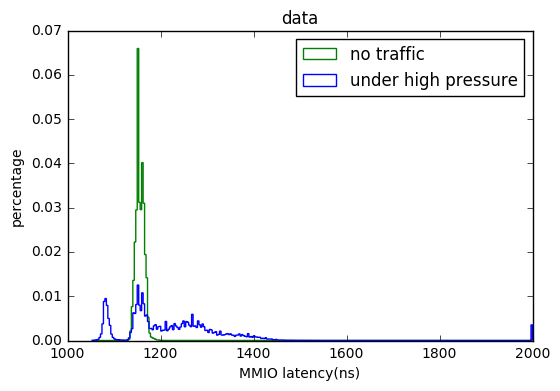

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

y0 = pd.read_csv("data.csv", header=None,names=["0"])
y1 = pd.read_csv("data2.csv", header=None,names=["1"])

y0 = y0["0"].where(y0["0"] < 2000, 2000)
y1 = y1["1"].where(y1["1"] < 2000, 2000)
plt.title("data")
plt.xlabel("MMIO latency(ns)")
plt.ylabel("percentage")
plt.hist([y0,y1],bins=300, label=["under high pressure","no traffic"], normed=True, histtype="step")
plt.legend()
plt.show()


## 積算グラフ

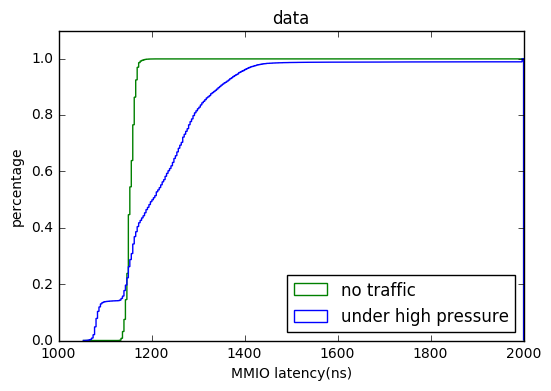

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

y0 = pd.read_csv("data.csv", header=None,names=["0"])
y1 = pd.read_csv("data2.csv", header=None,names=["1"])

y0 = y0["0"].where(y0["0"] < 2000, 2000)
y1 = y1["1"].where(y1["1"] < 2000, 2000)
plt.title("data")
plt.xlabel("MMIO latency(ns)")
plt.ylabel("percentage")
plt.hist([y0,y1],bins=300, label=["under high pressure","no traffic"], normed=True, histtype="step", cumulative=True)
plt.legend(loc='lower right')
plt.ylim([0,1.1])
plt.show()


## log scale

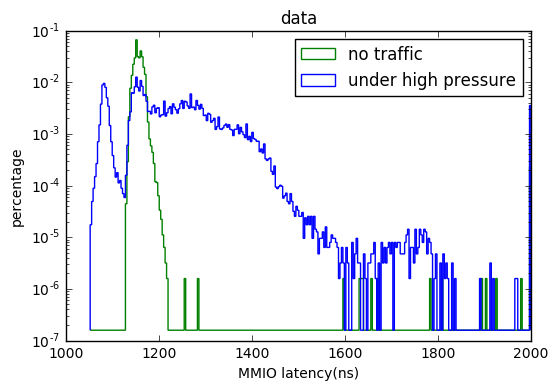

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

y0 = pd.read_csv("data.csv", header=None,names=["0"])
y1 = pd.read_csv("data2.csv", header=None,names=["1"])

y0 = y0["0"].where(y0["0"] < 2000, 2000)
y1 = y1["1"].where(y1["1"] < 2000, 2000)
plt.title("data")
plt.xlabel("MMIO latency(ns)")
plt.ylabel("percentage")
plt.hist([y0,y1],bins=300, label=["under high pressure","no traffic"], normed=True, histtype="step",log=True)
plt.legend()
plt.show()